In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


data=pd.read_csv('dataset.csv')

#replace inf by nan
data=data.replace([np.inf, -np.inf], np.nan)



In [2]:
#interpolate nan data
data=data.interpolate(method ='linear', limit_direction ='backward')
data.head()

,x,y
0,0.000000,-10.149463
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184


In [3]:
x=np.array(data['x']).reshape(np.size(data['x']),1)
y=np.array(data['y'])

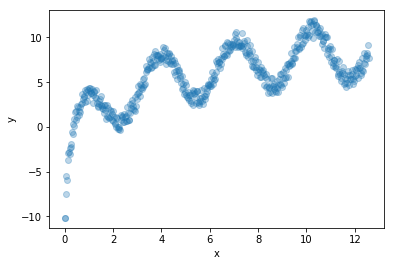

In [4]:
plt.figure()
plt.scatter(x[:, 0], y,alpha=0.3,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()  

In [5]:
"""
In this case we notice that our data is not linear, so we can't pply linear regression, the best method for this sinusoidal
shape looking data is kernelRidge regression with an rbf Kernel

"""

"\nIn this case we notice that our data is not linear, so we can't pply linear regression, the best method for this sinusoidal\nshape looking data is kernelRidge regression with an rbf Kernel\n\n"

In [6]:
from sklearn.kernel_ridge import KernelRidge

In [7]:
reg = KernelRidge(kernel='rbf')
reg.fit(x, y)
p=reg.predict(x)

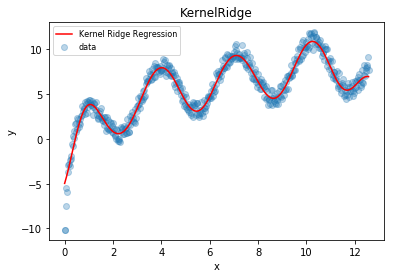

'\nHere we can see the approximation of the regression function\n'

In [8]:
plt.figure()
plt.title(reg.__class__.__name__)
plt.scatter(x[:, 0], y,alpha=0.3,label='data')
plt.plot(x, p,color='RED',label='Kernel Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()   
"""
Here we can see the approximation of the regression function
"""

In [9]:
"""
In order to answer the given problematic to 15, we suggest to generate the x values to 15, using a mean step
"""

'\nIn order to answer the given problematic to 15, we suggest to generate the x values to 15, using a mean step\n'

In [10]:
#compute step to generate x : the mean of  the difference between each element of x with his successor.
x_step=np.mean(np.diff(x.ravel()))

#init min & max as requested
x_max=15
x_min=np.max(x)

#extend x
x_extend=np.arange(start=np.max(x), stop=15, step=x_step)
x_extend=x_extend.reshape(np.size(x_extend),1)

#extend y
y_extend=np.empty(len(x_extend)).reshape(np.size(x_extend),1)
y_extend[:]=np.nan

#merge x and y
data_extend = np.concatenate((x_extend,y_extend),axis=1)
data_extend = pd.DataFrame(data_extend, columns = ['x','y'])
data_extend.head()

,x,y
0,12.566371,NaN
1,12.591554,NaN
2,12.616737,NaN
3,12.641920,NaN
4,12.667103,NaN


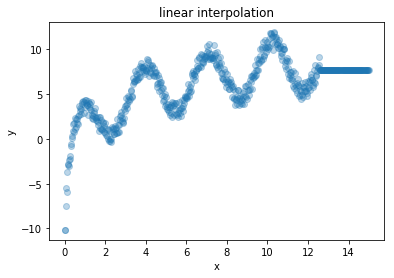

"\nHere we apply a linear interpolation, but the results aren't good for our data, \nso we decide to go with polynomial/cubic/spline...Etc\n"

In [11]:
#concat original data with synthetic data
df=pd.concat([data, data_extend])
d=df.interpolate(method='linear', limit_direction ='both')
xx=np.array(d['x']).reshape(np.size(d['x']),1)
yy=np.array(d['y'])

#vizualise the data
plt.figure()
plt.title('linear interpolation')
plt.scatter(xx[:, 0], yy,alpha=0.3,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
"""
Here we apply a linear interpolation, but the results aren't good for our data, 
so we decide to go with polynomial/cubic/spline...Etc
"""

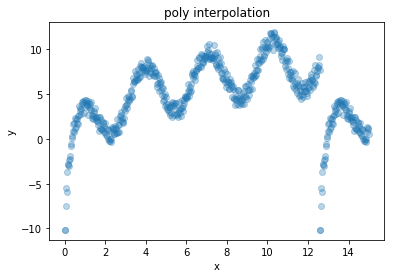

' \nThe polynomial/cubic and other methods are just giving the same result, they clone the first data occurences\nThis what makes index methods and inerpolations weak\n'

In [12]:
#concat original data with synthetic data
df=pd.concat([data, data_extend])
d=df.interpolate(method='polynomial', order=3, limit_direction ='both')
xx=np.array(d['x']).reshape(np.size(d['x']),1)
yy=np.array(d['y'])

#vizualise the data
plt.figure()
plt.title('poly interpolation')
plt.scatter(xx[:, 0], yy,alpha=0.3,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

""" 
The polynomial/cubic and other methods are just giving the same result, they clone the first data occurences
This what makes index methods and inerpolations weak
"""

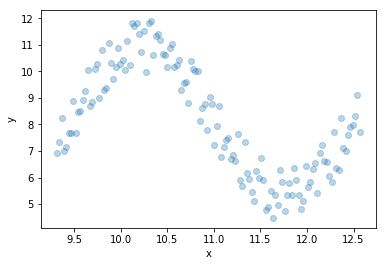

'\nWe can notice that there is a period of 130 element regulary, the idea is to save the steps (jumps) of the period elements\nto clone it at the end of our dataset\n'

In [13]:
#We try to search for the period of our data distribution
d=df[370:500]
xx=np.array(d['x']).reshape(np.size(d['x']),1)
yy=np.array(d['y'])
plt.figure()
plt.scatter(xx[:, 0], yy,alpha=0.3,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
"""
We can notice that there is a period of 130 element regulary, the idea is to save the steps (jumps) of the period elements
to clone it at the end of our dataset
"""

In [14]:
#we init the start point as the last filled point
start = yy[-1]

#we compute all the differences
steps=np.diff(yy.ravel())[:len(data_extend)]

#we create a vector that will contain generated y data points
y_=np.zeros(len(data_extend))
y_[0]=data.iloc[-1]['y']




In [15]:
for i in range(1,len(steps)):
    y_[i]=y_[i-1] + steps[i-1]

In [16]:
data_extend['y']=y_

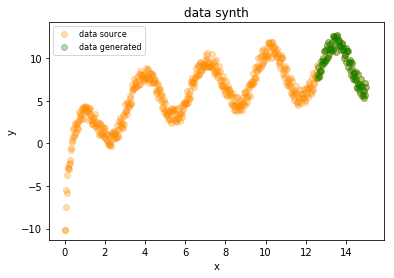

'\nHere we can vizualise the extension from 12.5 to 15, the data looks perfect for the sinuosidal approx\n'

In [47]:
#concat original data with synthetic data
df=pd.concat([data, data_extend])
#df=df.interpolate(method ='cubic', limit_direction ='backward')
#interpolate(method='index', inplace=True)
xx=np.array(df['x']).reshape(np.size(df['x']),1)
yy=np.array(df['y'])
plt.figure()
plt.title('data synth')
plt.scatter(xx[:, 0], yy,alpha=0.3,label='data source',color='darkorange')
plt.scatter(xx[-len(y_):, 0], y_,alpha=0.3,label='data generated', color='green')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})

plt.xlabel('x')
plt.ylabel('y')
plt.show()

"""
Here we can vizualise the extension from 12.5 to 15, the data looks perfect for the sinuosidal approx
"""

In [18]:
reg = KernelRidge(kernel='rbf')
reg.fit(xx, yy)
p=reg.predict(xx)

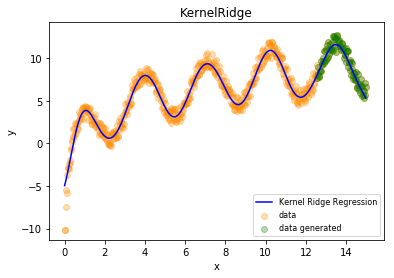

In [19]:
plt.figure()
plt.title(reg.__class__.__name__)
plt.scatter(xx[:, 0], yy,alpha=0.3,label='data', color='darkorange')
plt.scatter(xx[-len(y_):, 0], y_,alpha=0.3,label='data generated', color='green')
plt.plot(xx, p,color='blue',label='Kernel Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()  

In [31]:

#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

errorRMSE=mean_squared_error(yy,p)**0.5
errorMAE=mean_absolute_error(yy,p)**0.5

print(f'error RMSE= {errorRMSE} / erreur MAE= {errorMAE}')

error RMSE= 0.6830907260219251 / erreur MAE= 0.7196513663690689


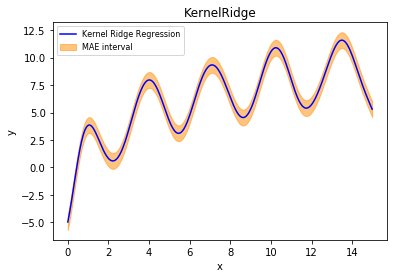

In [36]:
#Vizualise error interval
plt.figure()
plt.title(reg.__class__.__name__)
plt.plot(xx, p,color='blue',label='Kernel Ridge Regression')
plt.fill_between(xx[:, 0], p - errorMAE, p + errorMAE, color='darkorange',alpha=0.5,label='MAE interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()  

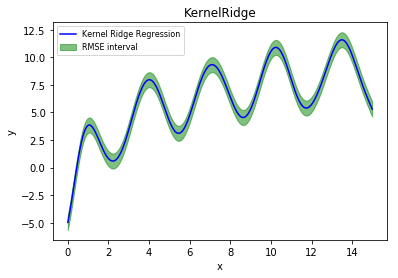

In [45]:
#Vizualise error interval
plt.figure()
plt.title(reg.__class__.__name__)
plt.plot(xx, p,color='blue',label='Kernel Ridge Regression')
plt.fill_between(xx[:, 0], p - errorRMSE, p + errorRMSE, color='green',alpha=0.5,label='RMSE interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()  

In [ ]:
"""
We notice that there is no big difference between the MSE/MAE errors, we can say that our model can err the y value
with a 0.7 more or less +-(0.7) 
"""